<a href="https://colab.research.google.com/github/Finyasy/CNN/blob/main/Bryan_Bosire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #for data importing and manipulation
import numpy as np #for data manipulation and cleaning
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization
%matplotlib inline
 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
#loading the datasets
#data = pd.read_csv(r"C:\Users\bryan\Downloads\Bosire.csv")
from google.colab import files
uploaded = files.upload()

#data.head()
import io
train_data = pd.read_csv(io.BytesIO(uploaded['Bosire.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['Bosire2.csv']))

Saving Bosire2.csv to Bosire2 (5).csv
Saving Bosire.csv to Bosire (5).csv


In [ ]:
train_data.head()

,CUST_TXN_DATE,CUST_ID_ACCT1,DEPOSIT_AMNT_MPSA,RCVD_AMNT_MPSA,TRSF_FROM_BANK_TO_MPESA_AMNT,MPSA_CREDITS,DAYS_ARTM_LESS_2,X_NR_TOT_LOAN_AMNT_OKOA_JAZI,LOAN_AGE_DAYS
0,20160201,3008009,27590,53226.0,0.0,80816.0,139,800.0,5
1,20160201,12083048,2140,0.0,2170.0,4310.0,154,0.0,8
2,20160201,12930260,25700,37974.0,38972.0,102646.0,1,0.0,27
3,20160201,6422098,9250,2180.0,0.0,11430.0,64,0.0,5
4,20160201,5395787,102401,7169.0,0.0,109570.0,53,450.0,31


In [ ]:
test_data.head()

,CUST_TXN_DATE,CUST_ID_ACCT1,DEPOSIT_AMNT_MPSA,RCVD_AMNT_MPSA,TRSF_FROM_BANK_TO_MPESA_AMNT,MPSA_CREDITS,DAYS_ARTM_LESS_2,X_NR_TOT_LOAN_AMNT_OKOA_JAZI,LOAN_AGE_DAYS
0,20160209,906645,0,4682,0,4682,45,10.0,30
1,20160209,5649252,4860,5600,0,10460,137,0.0,31
2,20160209,8483557,9000,0,0,9000,0,0.0,307
3,20160209,10471136,1860,14320,0,16180,70,0.0,20
4,20160209,3536501,2227,2573,0,4800,101,990.0,19


In [ ]:
len(train_data),len(test_data)

(10329, 917)

# **DATA VALIDATION**

In [ ]:
#checking missing values in our data
train_data.isnull().sum()

CUST_TXN_DATE                   0
CUST_ID_ACCT1                   0
DEPOSIT_AMNT_MPSA               0
RCVD_AMNT_MPSA                  0
TRSF_FROM_BANK_TO_MPESA_AMNT    0
MPSA_CREDITS                    0
DAYS_ARTM_LESS_2                0
X_NR_TOT_LOAN_AMNT_OKOA_JAZI    0
LOAN_AGE_DAYS                   0
dtype: int64

In [ ]:
test_data.isnull().sum()

CUST_TXN_DATE                   0
CUST_ID_ACCT1                   0
DEPOSIT_AMNT_MPSA               0
RCVD_AMNT_MPSA                  0
TRSF_FROM_BANK_TO_MPESA_AMNT    0
MPSA_CREDITS                    0
DAYS_ARTM_LESS_2                0
X_NR_TOT_LOAN_AMNT_OKOA_JAZI    0
LOAN_AGE_DAYS                   0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CUST_TXN_DATE                 10329 non-null  int64  
 1   CUST_ID_ACCT1                 10329 non-null  int64  
 2   DEPOSIT_AMNT_MPSA             10329 non-null  int64  
 3   RCVD_AMNT_MPSA                10329 non-null  float64
 4   TRSF_FROM_BANK_TO_MPESA_AMNT  10329 non-null  float64
 5   MPSA_CREDITS                  10329 non-null  float64
 6   DAYS_ARTM_LESS_2              10329 non-null  int64  
 7   X_NR_TOT_LOAN_AMNT_OKOA_JAZI  10329 non-null  float64
 8   LOAN_AGE_DAYS                 10329 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 726.4 KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CUST_TXN_DATE                 917 non-null    int64  
 1   CUST_ID_ACCT1                 917 non-null    int64  
 2   DEPOSIT_AMNT_MPSA             917 non-null    int64  
 3   RCVD_AMNT_MPSA                917 non-null    int64  
 4   TRSF_FROM_BANK_TO_MPESA_AMNT  917 non-null    int64  
 5   MPSA_CREDITS                  917 non-null    int64  
 6   DAYS_ARTM_LESS_2              917 non-null    int64  
 7   X_NR_TOT_LOAN_AMNT_OKOA_JAZI  917 non-null    float64
 8   LOAN_AGE_DAYS                 917 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 64.6 KB


In [ ]:
#data.describe gives us a summary statistics such as count,mean,standard deviation,minimum,maximum and quantiles of data
train_data.describe()

,CUST_TXN_DATE,CUST_ID_ACCT1,DEPOSIT_AMNT_MPSA,RCVD_AMNT_MPSA,TRSF_FROM_BANK_TO_MPESA_AMNT,MPSA_CREDITS,DAYS_ARTM_LESS_2,X_NR_TOT_LOAN_AMNT_OKOA_JAZI,LOAN_AGE_DAYS
count,1.032900e+04,1.032900e+04,1.032900e+04,1.032900e+04,1.032900e+04,1.032900e+04,10329.000000,10329.000000,10329.000000
mean,2.016021e+07,8.416440e+06,1.860261e+04,3.060607e+04,5.412641e+03,5.462133e+04,84.179979,309.797822,45.805305
std,7.900788e+00,3.707265e+06,1.331564e+05,1.892388e+05,4.106180e+04,2.543278e+05,54.897796,1139.253170,78.756136
min,2.016020e+07,5.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
25%,2.016021e+07,5.746064e+06,2.500000e+02,2.200000e+02,0.000000e+00,4.684000e+03,35.000000,0.000000,10.000000
50%,2.016022e+07,9.519227e+06,2.790000e+03,3.854000e+03,0.000000e+00,1.277400e+04,95.000000,0.000000,20.000000
75%,2.016022e+07,1.122943e+07,9.670000e+03,1.756400e+04,0.000000e+00,3.503000e+04,130.000000,150.000000,31.000000
max,2.016023e+07,1.366975e+07,7.858300e+06,1.260546e+07,1.720000e+06,1.264766e+07,182.000000,32100.000000,315.000000


In [ ]:
test_data.describe()

,CUST_TXN_DATE,CUST_ID_ACCT1,DEPOSIT_AMNT_MPSA,RCVD_AMNT_MPSA,TRSF_FROM_BANK_TO_MPESA_AMNT,MPSA_CREDITS,DAYS_ARTM_LESS_2,X_NR_TOT_LOAN_AMNT_OKOA_JAZI,LOAN_AGE_DAYS
count,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,917.000000,9.170000e+02,917.000000,917.000000,917.000000
mean,2.016022e+07,8.531685e+06,14434.890949,3.701304e+04,4359.902944,5.580783e+04,85.874591,308.546521,47.441658
std,7.733898e+00,3.777752e+06,54546.573185,4.195900e+05,20699.988066,4.263768e+05,53.881851,975.848656,80.529783
min,2.016021e+07,3.123100e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,2.016021e+07,5.900966e+06,200.000000,3.000000e+02,0.000000,5.115000e+03,43.000000,0.000000,10.000000
50%,2.016022e+07,9.726945e+06,2650.000000,4.462000e+03,0.000000,1.390000e+04,95.000000,0.000000,20.000000
75%,2.016023e+07,1.150027e+07,9272.000000,2.028800e+04,200.000000,3.957000e+04,132.000000,140.000000,31.000000
max,2.016023e+07,1.366975e+07,967838.000000,1.260546e+07,275767.000000,1.264766e+07,179.000000,10080.000000,307.000000


In [ ]:
# Create target column
train_data['LOAN_DEFAULTED'] = ''

# Loop through dataframe and create new column to show if a loan has defaulted
# we consider two risk classes for the Binary-class classification problem.
# A risk is considered “good” if the customer is not in arrears or is in arrears for less than 90 days else "Bad" for defaulting
for row in train_data.itertuples():
    loan_age = train_data.at[row.Index, 'LOAN_AGE_DAYS']
    if loan_age > 90:
      train_data.at[row.Index, 'LOAN_DEFAULTED'] = 'Bad'
    else:
      train_data.at[row.Index, 'LOAN_DEFAULTED'] = 'Good'

In [ ]:
# Remove unneeded columns (the customers ID and Loan Age Days have been replaced with whether the loan has defaulted)
target_name = "LOAN_DEFAULTED"
X,y = train_data.drop(columns = target_name),train_data[target_name]

X = X.drop(columns = "CUST_TXN_DATE")
X = X.drop(columns = "LOAN_AGE_DAYS")
X = X.drop(columns = "CUST_ID_ACCT1")

In [ ]:
X.head()

,DEPOSIT_AMNT_MPSA,RCVD_AMNT_MPSA,TRSF_FROM_BANK_TO_MPESA_AMNT,MPSA_CREDITS,DAYS_ARTM_LESS_2,X_NR_TOT_LOAN_AMNT_OKOA_JAZI
0,27590,53226.0,0.0,80816.0,139,800.0
1,2140,0.0,2170.0,4310.0,154,0.0
2,25700,37974.0,38972.0,102646.0,1,0.0
3,9250,2180.0,0.0,11430.0,64,0.0
4,102401,7169.0,0.0,109570.0,53,450.0


# **Data Visualization**

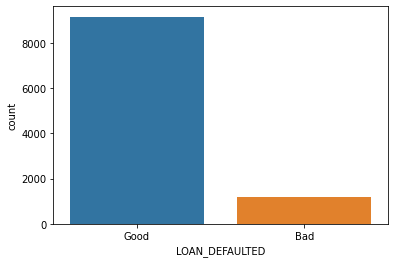

In [ ]:
sns.countplot(x= "LOAN_DEFAULTED", data= train_data)
plt.show()
#few numbers of customers default

In [ ]:
#percentage of good and bad 
train_data.LOAN_DEFAULTED.value_counts(normalize= True) *100

Good    88.643625
Bad     11.356375
Name: LOAN_DEFAULTED, dtype: float64

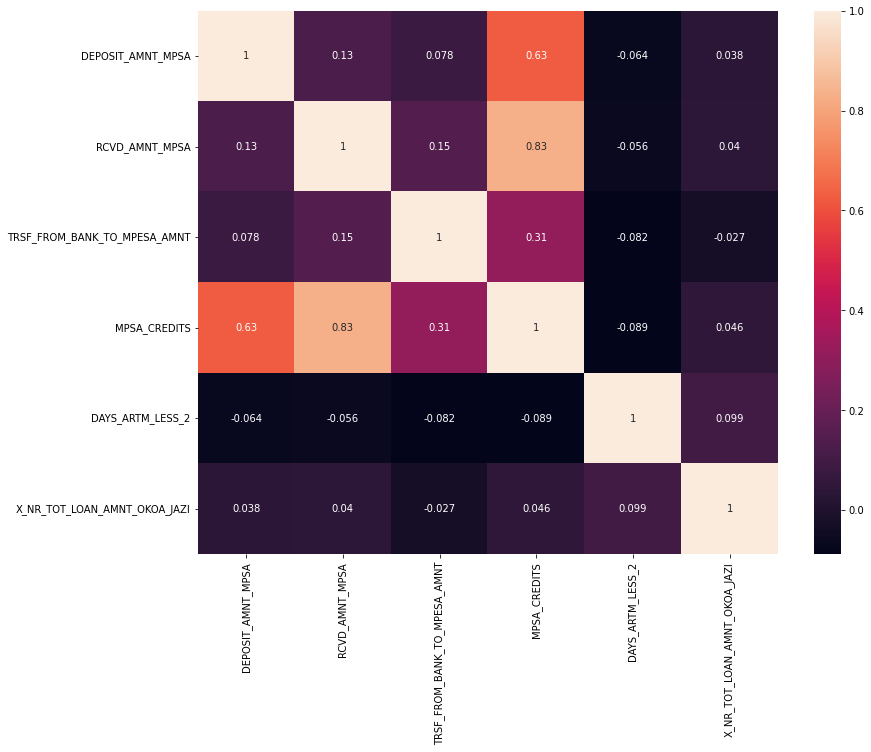

In [ ]:
#corr() shows us correlated features.It’s a good practice to remove correlated variables during feature selection.
#This is important since correlated features contain similar information leading to the curse of dimensionality(high dimensional spaces)
 
 
corr_df = X.corr()
 
plt.figure(figsize = (13,10))
sns.heatmap(corr_df, annot=True)
plt.savefig('df_heatmap.png')

# **Modelling and Prediction Making**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y= train_test_split(X,y,test_size= 0.2)

In [ ]:
print (type(train_y))

print (train_y)

<class 'pandas.core.series.Series'>
9239    Good
5066    Good
4806    Good
6320    Good
1196    Good
        ... 
5416    Good
8042    Good
84      Good
4705     Bad
4463    Good
Name: LOAN_DEFAULTED, Length: 8263, dtype: object


# Hyper parameter tuning 

In [ ]:
Rf= RandomForestClassifier(n_estimators= 1000,warm_start=True, random_state= 0)
Ab= AdaBoostClassifier(n_estimators= 350, learning_rate= 0.1)
Rf.fit(
    train_x, 
       train_y)
pred= Rf.predict(val_x)
Ab.fit(train_x, train_y)
preds= Ab.predict(val_x)
print("RF's accuracy score:",accuracy_score(pred,val_y))
print("Ab's accuracy score:", accuracy_score(preds, val_y))

RF's accuracy score: 0.8877057115198451
Ab's accuracy score: 0.8785091965150048


In [ ]:
gbr= GradientBoostingClassifier(learning_rate= 0.1, random_state= 0, n_estimators= 50)
gbr.fit(train_x, train_y)
prd= gbr.predict(val_x)

print("GBR's accuracy score:",accuracy_score(val_y, prd))

GBR's accuracy score: 0.8785091965150048


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(train_x, train_y)
prd= gbr.predict(val_x)

print("xgboost accuracy score:",accuracy_score(val_y,prd))

xgboost accuracy score: 0.8785091965150048


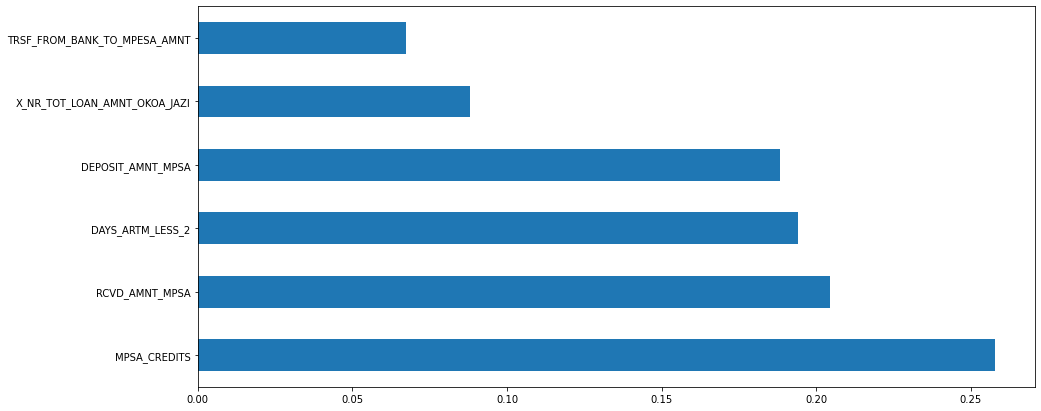

In [ ]:
#feature importance for Random ForestClassifier

%matplotlib inline 
plt.figure(figsize=(15,7))
feat_importances = pd.Series(Rf.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
#Model fitting with preprocessing
#Normalization using a scikit-learn transformer called StandardScaler.
#This transformer shifts and scales each feature individually so that they all have a 0-mean and a unit standard deviation.
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)

In [ ]:
#scikit-learn Pipeline
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 500))
model

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
model.named_steps

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=500,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [ ]:
start = time.time()
model.fit(train_x, train_y)
elapsed_time = time.time() - start

In [ ]:
model_name = model.__class__.__name__
score = model.score(val_x, val_y)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

The accuracy using a Pipeline is 0.879 with a fitting time of 0.046 seconds in 15 iterations


In [ ]:
#Model evaluation using cross-validation

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))
cv_result = cross_validate(model, X,y, cv=5)
cv_result

{'fit_time': array([0.03554988, 0.0484302 , 0.0468564 , 0.0452559 , 0.04817843]),
 'score_time': array([0.00828791, 0.00815153, 0.0082016 , 0.0083611 , 0.01141453]),
 'test_score': array([0.88673766, 0.88625363, 0.88625363, 0.88625363, 0.88668281])}

In [ ]:
scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.886 +/- 0.000


In [ ]:
print(
    f"Accuracy score of our model:\n"
    f"{cv_result['test_score'].mean():.3f} +/- "
    f"{cv_result['test_score'].std():.3f}")

Accuracy score of our model:
0.886 +/- 0.000


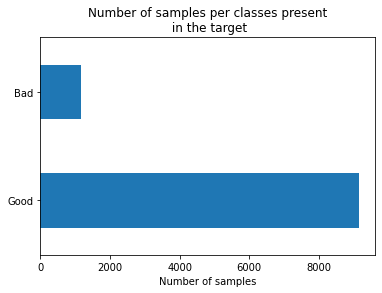

In [ ]:
### Evaluation of model.
import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

# **Confusion Matrix and Derived Metrics**

In [ ]:
gbr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

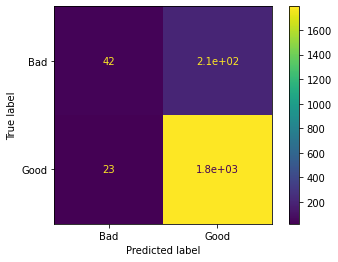

In [ ]:
#Accuracy is an aggregate of the errors made by the classifier
#independently what the error is for each of the two following cases:
  # 1.we predicted that a customer will give default but she/he did not
  # 2.we predicted that a customer will not  but she/hdefaulte did.

from sklearn.metrics import plot_confusion_matrix

_ = plot_confusion_matrix(Rf, val_x, val_y)


[[  42  209]
 [  23 1792]]


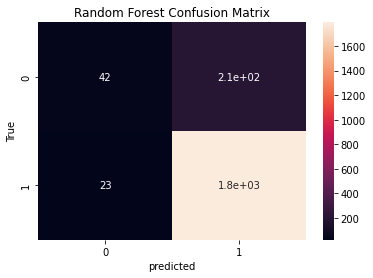

<Figure size 720x432 with 0 Axes>

In [ ]:
ax= plt.subplot()
cm= confusion_matrix(val_y, pred)
print(cm)
sns.heatmap(cm, annot= True, ax= ax);

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("True");
ax.set_title("Random Forest Confusion Matrix");

[[   0  251]
 [   0 1815]]


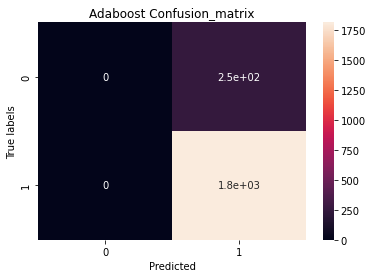

<Figure size 720x432 with 0 Axes>

In [ ]:
ax= plt.subplot()
dm= confusion_matrix(val_y,preds)
print(dm)
sns.heatmap(dm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
plt.figure(figsize=(10,6))
ax.set_xlabel('Predicted');ax.set_ylabel('True labels'); 
ax.set_title('Adaboost Confusion_matrix');

[[   0  251]
 [   0 1815]]


Text(0.5, 1.0, 'Gradient Confusion mattix')

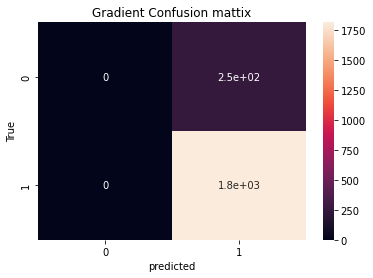

<Figure size 720x432 with 0 Axes>

In [ ]:
ax= plt.subplot()
pm= confusion_matrix(val_y, prd)
print(pm)
sns.heatmap(pm, annot= True, ax= ax)

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("True")
ax.set_title("Gradient Confusion mattix")

In [ ]:
# the top left corner are true positives (TP) and corresponds to customers who  defaulted and were predicted as such by the classifier
# the bottom right corner are true negatives (TN) and correspond to customers who did not default and were predicted as such by the classifier

# the top right corner are false negatives (FN) and correspond to customers who defaulted but were predicted to not have defaulted
# the bottom left corner are false positives (FP) and correspond to customers who did not default but were predicted to have defaulted.

In [ ]:
#Precision = TP / (TP + FP) and represents how likely the customer actually defaulted when the classifier predicted that they did.
#Recall = TP / (TP + FN) and assesses how well the classifier is able to correctly identify people who defaulted. 

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(val_y, pred, pos_label="Good")
recall = recall_score(val_y, pred, pos_label="Good")

print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")

Precision score: 0.896
Recall score: 0.987


# **The issue of class imbalance**

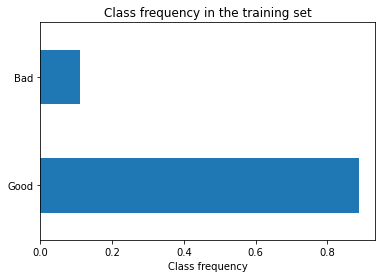

In [ ]:
train_y.value_counts(normalize=True).plot.barh()
plt.xlabel("Class frequency")
_ = plt.title("Class frequency in the training set")

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(train_x, train_y)
print(f"Accuracy of the dummy classifier: "
      f"{dummy_classifier.score(val_x, val_y):.3f}")

#without learning anything from the data data, is capable of predicting as accurately as our logistic regression model

Accuracy of the dummy classifier: 0.879


In [ ]:
#The balanced accuracy is equivalent to accuracy in the context of balanced classes. 
#It is defined as the average recall obtained on each class
#Good for class imbalace problem instead of accuracy
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(val_y,pred)
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

Balanced accuracy: 0.577


In [ ]:
#Evaluation and different probability thresholds

target_proba_predicted = pd.DataFrame(Rf.predict_proba(val_x),
                                      columns=Rf.classes_)
target_proba_predicted[:5]

,Bad,Good
0,0.163,0.837
1,0.028,0.972
2,0.100,0.900
3,0.121,0.879
4,0.050,0.950


In [ ]:
target_predicted = Rf.predict(val_x)
target_predicted[:5]

array(['Good', 'Good', 'Good', 'Good', 'Good'], dtype=object)

In [ ]:
equivalence_pred_proba = (
    target_proba_predicted.idxmax(axis=1).to_numpy() == target_predicted)
np.all(equivalence_pred_proba)

True

AttributeError: ignored

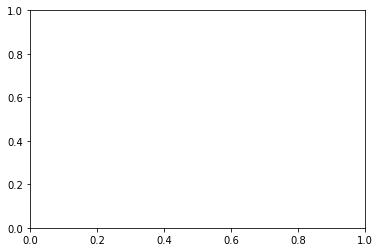

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(
    Rf, val_x, val_y, pos_label='Bad',
    marker="+"
)
_ = disp.ax_.set_title("Precision-recall curve")